# Songs statistics

We performed some statistics in order to understand the songs we stored on MongoDB.

In [8]:
import os
import json
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import os.path
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from nameparser import HumanName
import pymongo
from pymongo import MongoClient

   ## Artist with most songs from MongoDB

We are looking for the artist who wrote the largest number of songs.
First things first, we created a list with all the artists and then, using collections.Counter(), we printed what we were looking for.

At the top of the list we see David Bowie, with 210 songs written, that is because he had started to produce songs in 1962 and his activity period ended in 2016. Most of his songs were written in 80's and 90's when the music began to be distributed to a large public.

In [13]:
client = MongoClient("localhost",27017)
db = client["songs"]
collection = db["LyricsDB"]

cursor = db["LyricsDB"].find({})
artist_list=[]
for doc in cursor:
    artist_list.append(doc["Info"]["artist"])

#counter
count_artist=Counter()
for artist in artist_list:
    count_artist[artist]+=1
ordin=sorted(count_artist.items(), key=lambda x:x[1], reverse=True)
count_artist.most_common(10)

[('David Bowie', 210),
 ('Various Artists', 209),
 ('Dolly Parton', 209),
 ('Frank Sinatra', 209),
 ('Eminem', 208),
 ('Elton John', 208),
 ('Snoop Dogg', 207),
 ('Lil Wayne', 207),
 ('Rolling Stones', 206),
 ('Bob Dylan', 205)]

In [14]:
histlist_total=[]
for i in range(0,len(ordin)):
    histlist_total.append(ordin[i][1])

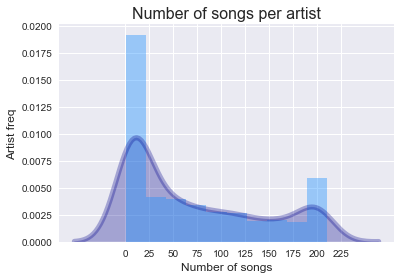

In [15]:
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (6, 4)})

fig, ax = plt.subplots()
sns.distplot(histlist_total,  color="dodgerblue", kde=True,
kde_kws={"color": "darkblue", "alpha":0.3, "linewidth": 5, "shade":True })
sns.despine(left=True)
plt.xlabel("Number of songs", fontsize=12)
plt.ylabel("Artist freq", fontsize=12)
#plt.legend(prop={'size':16})
plt.title("Number of songs per artist", fontsize = 16)
plt.xticks((0,25,50,75,100,125,150,175,200,225))

plt.show()

As we can see from the plot, most of the artists wrote from 1 to 25 songs.
Similarly, there is another peak around 200 songs as we could imagine looking at the previous list where all the artists had written more than 200 songs.

Anyway, we can say that the large part of the distribution is between 1 and 75 songs written per artist.

## Longer song from MongoDB

After we removed the albums from the barplot that is the result we got.
The longer song is Alice's Restaurant by Arlo Guthrie, as the bar plot shows, with the other nine longer songs.

On the other hand, in the histogram, we did not remove the albums and, as we can see from the plot, most of the songs are concentrated in the first part of the ditribution which is asymmetric with a long tail on the right and a mean around 1500 words.

In [19]:
client = MongoClient("localhost",27017)
db = client["songs"]
collection = db["LyricsDB"]
cursor = db["LyricsDB"].find({})

lyric_list=[]
title_list=[]
id_list=[]
for doc in cursor:
    lyric_list.append(doc["Info"]["lyrics"])
    title_list.append(doc["Info"]["title"])
    id_list.append(doc["_id"])

res=zip(title_list, lyric_list, id_list)
ziplist=list(res)

count_lyric=Counter()
for i,j,k in ziplist:
    for word in j:
        count_lyric[i,k]+=1

ordin_lyr=sorted(count_lyric.items(), key=lambda x:x[1], reverse=True)
histlist_lyr=[]
for i in range(0,16):
    histlist_lyr.append(ordin_lyr[i][1])

#remove the albums
histlist_lyr.pop(0)
histlist_lyr.pop(0)
histlist_lyr.pop(0)
histlist_lyr.pop(0)
histlist_lyr.pop(0)
histlist_lyr.pop(0)

histtick_lyr=[]
for i in range(0,16):
    histtick_lyr.append(ordin_lyr[i][0][0])

#remove the albums
histtick_lyr.pop(0)
histtick_lyr.pop(0)
histtick_lyr.pop(0)
histtick_lyr.pop(0)
histtick_lyr.pop(0)
histtick_lyr.pop(0)


'Billy The Mountain'

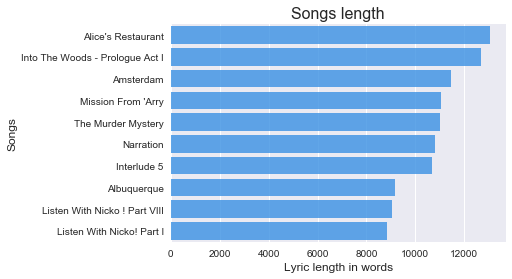

In [18]:
#barplot with the ten songs longest
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (6, 4)})

fig, ax = plt.subplots()
sns.barplot(x= histlist_lyr, y = histtick_lyr,  color="dodgerblue", alpha = .8)
sns.despine(left=True)
plt.xlabel("Lyric length in words", fontsize=12)
plt.ylabel("Songs", fontsize=12)
plt.title("Songs length", fontsize = 16)

plt.show()

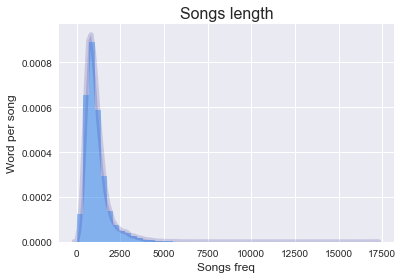

In [20]:
#histogram of songs length

histlist_song=[]
for i in range(0,len(ordin_lyr)):
    histlist_song.append(ordin_lyr[i][1])
    
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (6, 4)})

fig, ax = plt.subplots()
sns.distplot(histlist_song,  color="dodgerblue", kde=True,
kde_kws={"color": "darkblue", "alpha":0.15, "linewidth": 5, "shade":True })
sns.despine(left=True)
plt.xlabel("Songs freq", fontsize=12)
plt.ylabel("Word per song", fontsize=12)
plt.title("Songs length", fontsize = 16)

plt.show()

## Most popular words

The 20 most popular words, with their occurance, are:
('love', 106161),
 ('know', 95241),
 ('like', 89461),
 ('got', 73633),
 ('get', 66706),
 ('oh', 58479),
 ('want', 55371),
 ('one', 54559),
 ('never', 52199),
 ('go', 50722),
 ('see', 49323),
 ('let', 45861),
 ('time', 45552),
 ('come', 43807),
 ('make', 41495),
 ('baby', 40729),
 ('say', 38834),
 ('take', 36994),
 ('cause', 36793),
 ('way', 36155).
 
What is evident is that _love_ is the main theme for the songs we stored, not only because it is the most fequent word in the lyrics but even because it could be linked to other words such as _like_ or _baby_ which are both in the top 20 list.

In [1]:
def wordNorm(text):
    # Text normalizer: split the text in array without all spaces, stopwords, numbers
    new_text = []
    tokenizer = RegexpTokenizer(r'\w+')
    word_list = tokenizer.tokenize(text.lower())
    filtered_words = [word for word in word_list if word not in stopwords.words('english')]
    for word in filtered_words:
        if not word.isdigit() and len(word)>1 and wordnet.synsets(word):
            new_text.append(str(word))
    return(new_text)

In [6]:
client = MongoClient("localhost",27017)
db = client["songs"]
collection = db["LyricsDB"]
cursor = db["LyricsDB"].find({}, no_cursor_timeout=True)

lyric_list=[]
for doc in cursor:
    try:
        lyric_list.append(doc["Info"]["lyrics"])
    except:
        continue
#print(lyric_list_norm)

In [9]:
lyric_list_norm=[]
for lyric in lyric_list:
    lyric=wordNorm(lyric)
    lyric_list_norm.append(lyric)

In [11]:
#returns the songs with the longer lyrics
count_word=Counter()
for lyric in lyric_list_norm:
    for word in lyric:
        count_word[word]+=1
count_word.most_common(20)

[('love', 106161),
 ('know', 95241),
 ('like', 89461),
 ('got', 73633),
 ('get', 66706),
 ('oh', 58479),
 ('want', 55371),
 ('one', 54559),
 ('never', 52199),
 ('go', 50722),
 ('see', 49323),
 ('let', 45861),
 ('time', 45552),
 ('come', 43807),
 ('make', 41495),
 ('baby', 40729),
 ('say', 38834),
 ('take', 36994),
 ('cause', 36793),
 ('way', 36155)]

## Most common singers name

As showed in the bar plot, the most common singers names are _Tom, George, John, Michael, Kenny, Bob, Neil, Chris, Paul_ and_ Frank_.

In [21]:
name_list=[]
for i in artist_list:
    k=HumanName(i)
    name_list.append(k.first)

In [22]:
count_name=Counter()
for name in name_list:
    count_name[name]+=1

In [25]:
ordin_name=sorted(count_name.items(), key=lambda x:x[1], reverse=True)
histlist_name=[]
for i in range(0,11):
    histlist_name.append(ordin_name[i+1][1])
histlist_name.pop(2)
histtick_name=[]
for i in range(0,11):
    histtick_name.append(ordin_name[i+1][0])
histtick_name.pop(2)

'The'

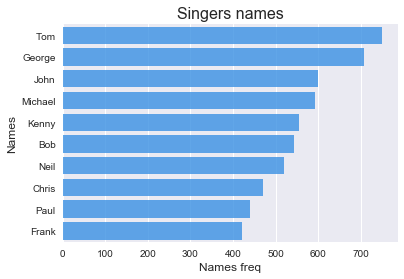

In [24]:
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (6, 4)})

fig, ax = plt.subplots()
sns.barplot(x= histlist_name, y = histtick_name,  color="dodgerblue", alpha = .8)
sns.despine(left=True)
plt.xlabel("Names freq", fontsize=12)
plt.ylabel("Names", fontsize=12)
plt.title("Singers names", fontsize = 16)

plt.show()